## Load Chicken and Cat Images

In [31]:
import numpy as np
from PIL import Image
import glob
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(42)

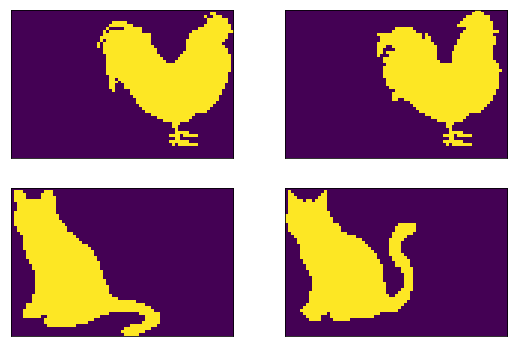

In [502]:
cats=[]
chickens=[]

for cat_label in ['A','B']:
    cat=Image.open('./chickens_and_cats/cat{:}.png'.format(cat_label))
    cat=cat.resize((75,50))
    cat=(np.array(cat).sum(2)!=1020).astype(float)
    cats.append(cat)

for chicken_label in ['A','B']:
    chicken=Image.open('./chickens_and_cats/chicken{:}.png'.format(chicken_label))
    chicken=chicken.resize((75,50))
    chicken=(np.array(chicken).sum(2)!=1020).astype(float)
    chickens.append(chicken)

image_size=chicken.shape
    
plt.figure(figsize=(9,6))
for nc,c in enumerate(chickens):
    plt.subplot(2,2,nc+1)
    plt.imshow(c)
    plt.xticks([]);plt.yticks([])
for nc,c in enumerate(cats):
    plt.subplot(2,2,nc+3)
    plt.imshow(c)
    plt.xticks([]);plt.yticks([])
plt.savefig('./Figs/patterns.svg')


### Generate Chicken Data
Generate multiple trials for each chicken

In [33]:
def generate_markov(eps=0.01):
    P=eps*np.random.rand(3,3)
    P[range(3),range(3)]=1.0-(np.sum(P,0)-np.diag(P))
    return P
def markov_step(state,P):
    dice=np.random.rand()
    ix=np.where(np.cumsum(P.dot(state))>=dice)[0][0]
    state=np.zeros((3,1))
    state[ix]=1
    return state
def simulate_chicken(cat,chicken,ts,P,f1=0.2,f2=0.31,p1=1.6,p2=0.7,noise=5):
    state=np.zeros((3,1))
    state[2]=1
    X=[]
    s=[]
    for t in ts:
        state=markov_step(state,P)
        im=((state[0]==1)|(state[2]==1))*cat*np.sin(2*np.pi*f1*t+p1)+((state[1]==1)|(state[2]==1))*chicken*np.sin(2*np.pi*f2*t+p2)+noise*np.random.rand(*cat.shape)
        X.append(im.ravel())
        s.append(np.where(state==1)[0][0])
    return np.vstack(X),s

T=120
ts=np.linspace(0,T,T*10)
#P=generate_markov(eps=0.02)

P=np.array([[0.97,0.01,0.02],[0.01,0.97,0.02],[0.015,0.015,0.97]]).T

X=[]
S=[]

for n in range(4):
    Xc=[]
    Sc=[]
    for cat in cats:
        for chicken in chickens:
            Xcn,scn=simulate_chicken(cat,chicken,ts,P,noise=5,f1=0.45,f2=0.71227)
            Xc.append(Xcn)
            Sc.append(scn)
    X.append(Xc)
    S.append(Sc)

## Plot sample chicken data

"\nanim=animation.FuncAnimation(fig,animate,init_func=init,frames=range(len(C)),interval=50,blit=True)\n\nHTML(anim.to_jshtml())\n\n\nWriter = animation.writers['ffmpeg']\nwriter = Writer(fps=15, metadata=dict(artist='JamesKG'), bitrate=1800)\nanim.save('test.mp4',writer=writer)\n"

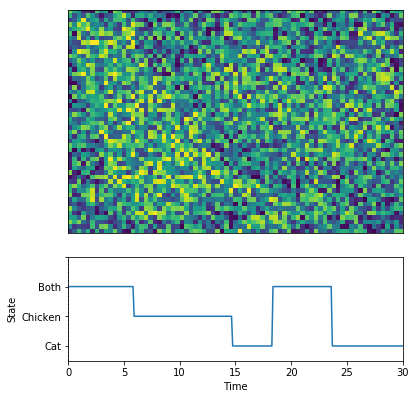

In [4]:
from matplotlib import animation, rc
from IPython.display import HTML

Tp=30
ts=np.linspace(0,Tp,Tp*10)
s=np.array(S[0][0][:(Tp*10)])
C=[x.reshape(image_size) for x in X[0][0][:(Tp*10)]]

fig=plt.figure(figsize=(6,6.5))
ax=plt.subplot2grid((3,1),(0,0),rowspan=2)
img=plt.imshow(C[0])
plt.xticks([]);plt.yticks([])
a1=plt.subplot2grid((3,1),(2,0))
plt.plot(ts,s)
line,=plt.plot([0,0],[-0.5,3.5],':',c=[0,0,0])
plt.ylim([-0.5,2.5])
plt.xlim([0,Tp])
plt.yticks(range(4),['Cat','Chicken','Both'])
plt.ylabel('State')
plt.xlabel('Time')

def init():
    img.set_data(C[0])
    line.set_data([0,0],[-0.5,3.5])
    return (img,line,)
def animate(i):
    img.set_data(C[i])
    line.set_data([i*0.1]*2,[-0.5,3.5])
    return (img,line,)

"""
anim=animation.FuncAnimation(fig,animate,init_func=init,frames=range(len(C)),interval=50,blit=True)

HTML(anim.to_jshtml())


Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='JamesKG'), bitrate=1800)
anim.save('test.mp4',writer=writer)
"""

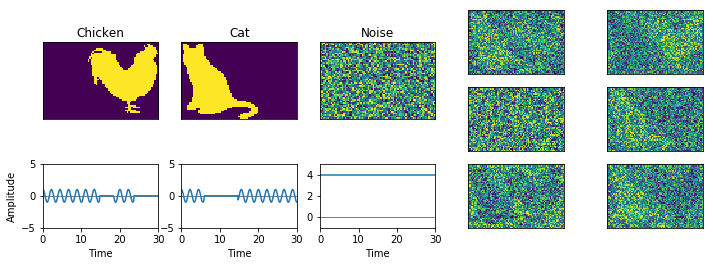

In [5]:
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

plt.figure(figsize=(12,4))
plt.subplot2grid((3,5),(0,0),rowspan=2)
plt.imshow(chickens[0])
plt.xticks([]);plt.yticks([])
plt.title('Chicken')
a1=plt.subplot2grid((3,5),(2,0))
sts=ts[:(Tp*10)]
plt.plot(sts,0.0*np.ones(sts.shape),c=[0,0,0],lw=0.5)
plt.plot(sts,np.sin(2*np.pi*0.45*sts+1.6)*((s==1)|(s==2)))
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.xlim([0,Tp])
plt.ylim([-5,5])

plt.subplot2grid((3,5),(0,1),rowspan=2)
plt.imshow(cats[0])
plt.xticks([]);plt.yticks([])
plt.title('Cat')
a1=plt.subplot2grid((3,5),(2,1))
sts=ts[:(Tp*10)]
plt.plot(sts,0.0*np.ones(sts.shape),c=[0,0,0],lw=0.5)
plt.plot(sts,np.sin(2*np.pi*0.45*sts+1.6)*((s==0)|(s==2)))
plt.xlabel('Time')
plt.xlim([0,Tp])
plt.ylim([-5,5])


plt.subplot2grid((3,5),(0,2),rowspan=2)
plt.imshow(np.random.rand(*image_size))
plt.xticks([]);plt.yticks([])
plt.title('Noise')
a3=plt.subplot2grid((3,5),(2,2))
plt.plot(sts,0.0*np.ones(sts.shape),c=[0,0,0],lw=0.5)
plt.plot(sts,4.0*np.ones(sts.shape))
#plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.xlim([0,Tp])
plt.ylim([-1,5])

Xplot=[x.reshape(image_size) for x in X[0][0][:40][::5]]

for k in range(6):
    plt.subplot2grid((3,5),(k%3,3+int(k/3)))
    plt.imshow(Xplot[k])
    plt.xticks([]);plt.yticks([])

plt.savefig('./Figs/simulation.svg')


### 1_Calculate_DMD

In [53]:
## import numpy as np
import copy
import matplotlib as mpl
import matplotlib.pyplot as plt
import h5py
import sys
from tqdm import tqdm as tqdm

class DMD(object):
    def __init__(self,n=[],p=[],h=[]):
        #optional inputs:
        #n = number of DMD modes to keep; if n=[] (default) then uses number of variables in C
        #p = if set and n==0, then uses first n modes to capture fraction 'p' of energy
        #h = timestep between measurements, for calculating frequencies in Hz
        #     (if h is unset, uses default of h=(14*60+33)/1200. for HCP data)
        self.n=n
        self.p=p
        self.h=h
      
    def fit(self,C):
        #inputs data array C -- rows are variables, columns are timepoints
        #split data matrix into two subarrays shifted by one timepoint
        #such that X[:,i+1]=Xp[:,i]
        X=copy.copy(C)
        X+=-np.mean(X,1)[:,None]
        Xp=X[:,1:]
        X=X[:,:-1]
  
        #compute SVD of data matrix
        U,S,V=np.linalg.svd(X,full_matrices=False)
        
        
        if (self.n==[])&(self.p!=[]):
            self.n=np.where((np.cumsum(S)/np.sum(S))>=self.p)[0][0]+1
            print('KEEPING {:} MODES TO CAPTURE {:} OF ENERGY'.format(self.n,self.p))
        if self.n==[]:
            self.n=X.shape[0]
        Ut=U[:,:self.n]
        Sinv=np.diag(1./S[:self.n])
        Vt=V[:self.n].T
      
        #compute reduced-dimensional representation of A-matrix
        Ap=(Ut.T).dot(Xp.dot(Vt.dot(Sinv)))
        #weight A by singular values
        Ah=np.diag(S[:self.n]**-0.5).dot(Ap.dot(np.diag(S[:self.n]**0.5)))
        #compute eigendecomposition of weighted A-matrix
        w,v=np.linalg.eig(Ah)
        v=np.diag(S[:self.n]**0.5).dot(v)
      
        #compute DMD modes from eigenvectors
        modes=Xp.dot(Vt.dot(Sinv.dot(v)))
        #computed this way, DMD modes are not normalized; norm gives power of mode in data
        power=np.real(np.sum(modes*modes.conj(),0))
       
        #timestep h set to 0.1
        self.h=0.1
        #use h to convert complex eigenvalues into corresponding oscillation frequencies
        freq=np.angle(w)/(2*np.pi*self.h)
      
        self.modes=modes
        self.power=power
        self.freq=freq
        self.svals=S


#PARAMETERS
FRAME0S=np.arange(0,1200,4)
nmodes=8
nframes=32

#only keep windows which do not extend beyond the data matrix
FRAME0S=FRAME0S[(FRAME0S+nframes)<=1200]

Fall=[]
jxall=[]
freqall=[]

for nr,(Xc,Sc) in enumerate(zip(X,S)):
    print('TRIAL {:}'.format(nr))
    sys.stdout.flush()
    Fs=[]
    freqs=[]
    powers=[]
    JX=[]
    for nc,(Xr,Sr) in enumerate(zip(Xc,Sc)):
        FT=[]
        PT=[]
        ux=[]
        jx=[]
        jno=[]
        Phi=[]
        for j,frame0 in enumerate(tqdm(FRAME0S)):
            #select window of data
            Xw=Xr[frame0:(frame0+nframes),:].T

            #perform DMD on window of data, calculated 'nmodes' modes
            dmd=DMD(n=nmodes)
            dmd.fit(Xw)
            phik=dmd.modes
            pt=dmd.power
            ft=dmd.freq
            svals=dmd.svals

            #only keep positive frequencies (drop conjugates)
            phik=phik[:,ft>=0]
            pt=pt[ft>=0]
            ft=ft[ft>=0]

            FT.append(ft)
            PT.append(pt)
            Phi.append(phik)
            #record:
            #subject number (ux),
            #window number (jx),
            #mode number within window (jno)
            ux.append(nc*np.ones((len(ft),)))
            jx.append(j*np.ones((len(ft),)))
            jno.append(np.arange(len(ft)))
            S.append(svals)
        F=np.absolute(np.hstack(Phi)).T
        freq=np.hstack(FT)
        ux=np.hstack(ux)
        jx=np.hstack(jx)
        jno=np.hstack(jno)
        
        Fs.append(F)
        freqs.append(freq)
        JX.append(jx)
    Fall.append(Fs)
    freqall.append(freqs)
    jxall.append(JX)


TRIAL 0


100%|██████████| 293/293 [00:01<00:00, 180.07it/s]


TRIAL 1


100%|██████████| 293/293 [00:01<00:00, 158.42it/s]


TRIAL 2


100%|██████████| 293/293 [00:01<00:00, 172.73it/s]


TRIAL 3


100%|██████████| 293/293 [00:01<00:00, 166.28it/s]


In [9]:
compute_times=np.array([145.65,170.16,175.75,180.07,160.33,167.43,176.83,158.42,178.87,167.36,164.19,172.73,182.72,166.01,175.45,166.28])
compute_times=1.0/compute_times*293
print('{:0.3f} +/- {:0.3f}'.format(np.mean(compute_times),np.std(compute_times)))

1.736 +/- 0.099


## 2_Calculate_Clusters-gDMD

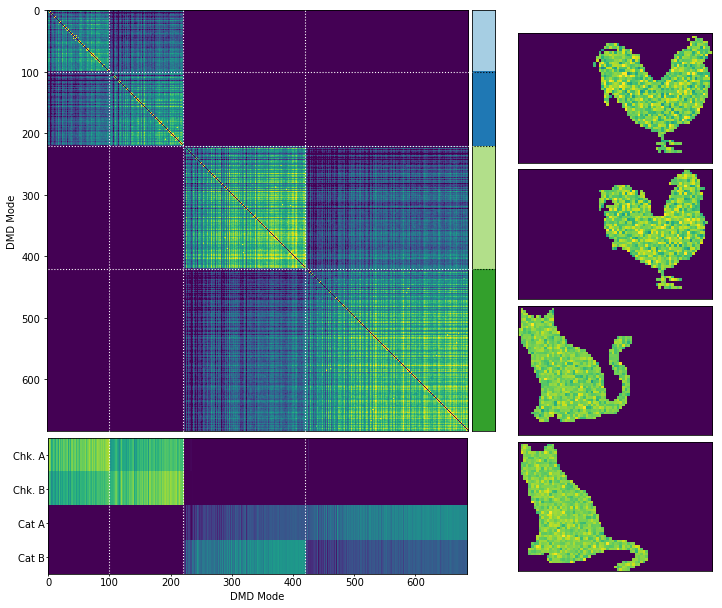

In [359]:
import scipy.cluster.hierarchy as sch
import scipy.spatial.distance as ssd
##CLUSTERING PARAMETERS:
mthresh=6
zthresh=0.75
min_clust_size=100
fclust_thresh=0.7


F=np.hstack([np.hstack([f.T for f in fs]) for fs in Fall]).T
#CALCULATE/THRESHOLD ON SPATIAL CONTINUITY
Mflat=(F-np.mean(F,1)[:,None])/F.std(1)[:,None]
mpro=[]
for f in Mflat:
    m=(f>2.0).reshape(image_size)
    #mpro: product of masks with masks which have been shifted diagonally
    mpro.append(np.sum(np.sum(m[1:,1:]*m[:-1,:-1],0),0))
mpro=np.hstack(mpro) 
mwhere=mpro>mthresh

#convert modes to zscores and threshold to create masks to cluster
Fz=F[mwhere,:]
Fz=(Fz-np.mean(Fz,1)[:,None])/np.std(Fz,1)[:,None]
Fn=(Fz>zthresh).astype(float)

#calculate overlap between mode masks and reference chickens
rsn=np.vstack([c.ravel() for c in chickens]+[c.ravel() for c in cats])
rlabs=['Chk. A','Chk. B','Cat A','Cat B']
overlap=rsn.dot(Mflat.T)

#cluster modes based upon average correlation between groups
method='average';metric='correlation';
Z=sch.linkage(Fn, method, metric)
ix=sch.dendrogram(Z,no_plot=True)['leaves']
#form flat clusters
cgroups=sch.fcluster(Z,fclust_thresh,'distance')[ix]
cgroups=cgroups.astype(float)

#count the number of modes belonging to each cluster, and remove clusters with less than 'min_clust_size' members
cun,count=np.unique(cgroups,return_counts=True)
for k,c in enumerate(cun):
    if count[k]<min_clust_size:
        cgroups[cgroups==c]=-1

cgroups=np.unique(cgroups,return_inverse=True)[1].astype(float)
cgroups[cgroups==0]=np.nan
cgroups+=-1

#cif
cif=np.isfinite(cgroups)
cuni=np.unique(cgroups[cif])

#sort the RSN overlap array by hierarchical clustering order
Ou=overlap[:,mwhere][:,ix][:,cif]
Ou=(Ou-Ou.mean(1)[:,None])/Ou.std(1)[:,None]
import skimage.transform as skit
#'scale_factor' is a factor to scale down plotted image size -- use for many thousands of modes
scale_factor=3
Fsub=skit.downscale_local_mean(Fn[ix][cif],(scale_factor,1))
Cor=ssd.cdist(Fsub,Fsub,metric=metric)
Cor=np.abs(1-Cor);
np.fill_diagonal(Cor,0)

# PLOT FIGURE

plt.figure(figsize=(16,9))

a1=plt.subplot2grid((6,1),(0,0))    
plt.imshow(Cor,vmin=Cor.mean(),vmax=Cor.mean()+2.0*Cor.std())
yl=plt.ylim()
plt.ylim(yl)
plt.xticks([])
plt.ylabel('DMD Mode')

a2=plt.subplot2grid((6,1),(1,0))
vmin=Ou.mean();vmax=Ou.mean()+2.0*Ou.std()
plt.imshow(skit.downscale_local_mean(Ou,(1,scale_factor)),aspect='auto',vmin=vmin,vmax=vmax)
plt.yticks(np.arange(len(rlabs)),rlabs,rotation=0)
a2.tick_params(pad=1,length=2)
xl=plt.xlim()
plt.xlim(xl)
plt.xlabel('DMD Mode')


a4=plt.subplot2grid((6,1),(2,0))
cbig=np.ones(cgroups.shape)*np.nan
ck=-1
for c in cuni:
    if np.sum(cgroups==c)>=min_clust_size:
        ck+=1
        cbig[cgroups==c]=ck
plt.imshow(cbig[cif][:,None]%12,cmap='Paired',aspect='auto',vmin=0,vmax=12)
plt.xticks([]);plt.yticks([])

a5=plt.subplot2grid((6,1),(3,0),frameon=False)
lplot=np.where(cbig[cif][1:]!=cbig[cif][:-1])[0].astype(float)/(Cor.shape[0]*scale_factor)
cut=0.95
for lp in lplot:
    plt.plot([0,cut],[lp]*2,':',c=[1,1,1],lw=1.1)
    plt.plot([cut,1],[lp]*2,':',c=[0,0,0],lw=1.1)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xticks([])
plt.yticks([])
a5.invert_yaxis()

a6=plt.subplot2grid((6,1),(4,0),frameon=False)
lplot=np.where(cbig[cif][1:]!=cbig[cif][:-1])[0].astype(float)/(Cor.shape[0]*scale_factor)
cut=0.95
for lp in lplot:
    plt.plot([lp]*2,[0,1],':',c=[1,1,1],lw=1.1)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xticks([])
plt.yticks([])

x1=0.0578
y1=0.3
y2=0.08
w1=0.364
a1.set_position([0.00,y1,0.48,0.65])
a2.set_position([x1,y2,w1,0.21])    
a4.set_position([0.426,y1,0.025*0.8,0.65])
a5.set_position([x1,y1,w1+0.025,0.65])
a6.set_position([x1,y2,w1,0.87])
glist=np.unique(cgroups[np.isnan(cgroups)==False]).astype(int)



glist_big=[]
for gid in glist:
    if np.sum(cgroups==gid)>=min_clust_size:
        glist_big.append(gid)
glist_big=np.array(glist_big)
DMN=[]
for gk,gid in enumerate(glist_big):
    a6=plt.axes([0.45,0.714-0.21*gk,0.2,0.2])
    dmn=np.mean(F[mwhere][ix][cgroups==gid],0)
    vmin=dmn.mean()+0.0*dmn.std();vmax=dmn.mean()+2.0*dmn.std()
    DMN.append(dmn)
    D=dmn.reshape(image_size)
    D[D==0]=np.nan
    cm=mpl.cm.viridis
    plt.imshow(D,vmin=vmin,vmax=vmax,cmap=cm)
    plt.xticks([]);plt.yticks([])


DMN=np.vstack(DMN)

filename='./Figs/clustering.svg'
plt.savefig(filename)


### Calculate traditional ICA

In [9]:
from sklearn.decomposition import FastICA
Xall=np.vstack([np.vstack(x) for x in X]).T
N=5
ICA=[]
for nica in tqdm(range(1,N+1)):
    ICA.append(FastICA(nica,max_iter=1000).fit_transform(Xall))

100%|██████████| 5/5 [05:07<00:00, 61.53s/it]


In [10]:
import scipy as sci
ICA_matched=[ICA[0]]
for k in range(len(ICA)-1):
    C=ssd.cdist(np.abs(ICA_matched[-1].T),np.abs(ICA[k+1].T))
    ork=sci.optimize.linear_sum_assignment(C)[1]
    ork=np.array(list(ork)+list(set(range(k+2))-set(ork)))
    print(ork)
    ICA_matched.append(ICA[k+1][:,ork])
    

[0 1]
[1 2 0]
[0 3 2 1]
[0 2 3 1 4]


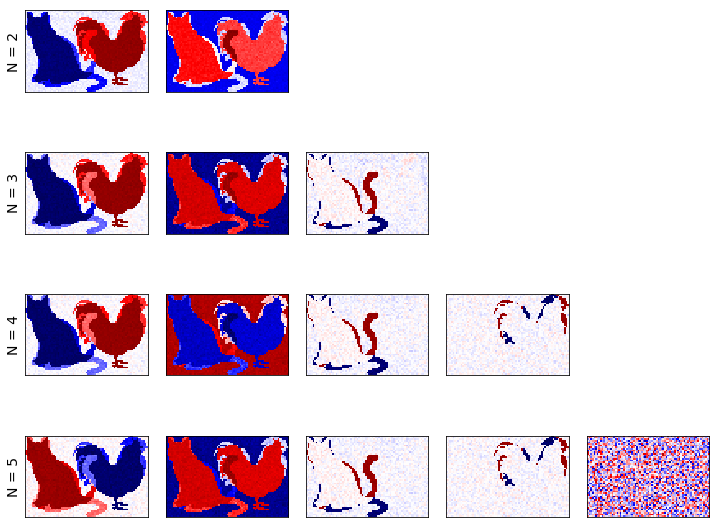

In [11]:
plt.figure(figsize=(12,10))
for nk,ica in enumerate(ICA_matched):
    if (nk>0)&(nk<6):
        for mk in range(nk+1):
            plt.subplot(5,6,6*(nk-1)+mk+1)
            icak=ica[:,mk]
            if np.mean(icak)<0:
                icak*=-1
            vr=np.maximum(-np.min(icak),np.max(icak))
            plt.imshow(icak.reshape(image_size),vmin=-vr,vmax=vr,cmap='seismic')
            plt.xticks([]);plt.yticks([])
            plt.tight_layout()

            if mk==0:
                plt.ylabel('N = {:}'.format(nk+1),fontsize=14)
            if nk==(6-1):
                plt.xlabel('Mode {:}'.format(mk+1),fontsize=14)
plt.savefig('./Figs/ICA.svg')

## Alternate ICA Approaches

In [12]:
#PARAMETERS
FRAME0S=np.arange(0,1200,4)
nica=3
nframes=32

#only keep windows which do not extend beyond the data matrix
FRAME0S=FRAME0S[(FRAME0S+nframes)<=1200]

Ficall=[]

for nr,(Xc,Sc) in enumerate(zip(X,S)):
    print('TRIAL {:}'.format(nr))
    sys.stdout.flush()
    Ficas=[]
    for nc,(Xr,Sr) in enumerate(zip(Xc,Sc)):
        ICA=[]
        for j,frame0 in enumerate(tqdm(FRAME0S)):
            #select window of data
            Xw=Xr[frame0:(frame0+nframes),:].T

            #perform DMD on window of data, calculated 'nmodes' modes
            ICA.append(FastICA(nica,max_iter=1000).fit_transform(Xw))
        Fica=np.absolute(np.hstack(ICA)).T
        Ficas.append(Fica)
    Ficall.append(Ficas)

TRIAL 0


 96%|█████████▌| 280/293 [00:05<00:00, 54.76it/s]/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/fastica_.py:118: UserWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
100%|██████████| 293/293 [00:05<00:00, 49.40it/s]

TRIAL 1



100%|██████████| 293/293 [00:08<00:00, 34.97it/s]

TRIAL 2



100%|██████████| 293/293 [00:08<00:00, 35.87it/s]

TRIAL 3



100%|██████████| 293/293 [00:07<00:00, 37.16it/s]


In [10]:
compute_times=np.array([52.20,55.01,50.16,49.40,41.97,32.44,41.21,34.97,45.89,41.12,42.42,35.87,40.04,41.54,38.01,37.16])
compute_times=1.0/compute_times*293
print('{:0.3f} +/- {:0.3f}'.format(np.mean(compute_times),np.std(compute_times)))

7.048 +/- 1.012


In [364]:
metric='correlation'

ica=np.hstack([np.hstack([f.T for f in fs]) for fs in Ficall]).T
Cica=ssd.cdist(rsn,ica,metric=metric)
Cica=np.abs(1-Cica)

dmd=np.hstack([np.hstack([f.T for f in fs]) for fs in Fall]).T
Cdmd=ssd.cdist(rsn,dmd,metric=metric)
Cdmd=np.abs(1-Cdmd)

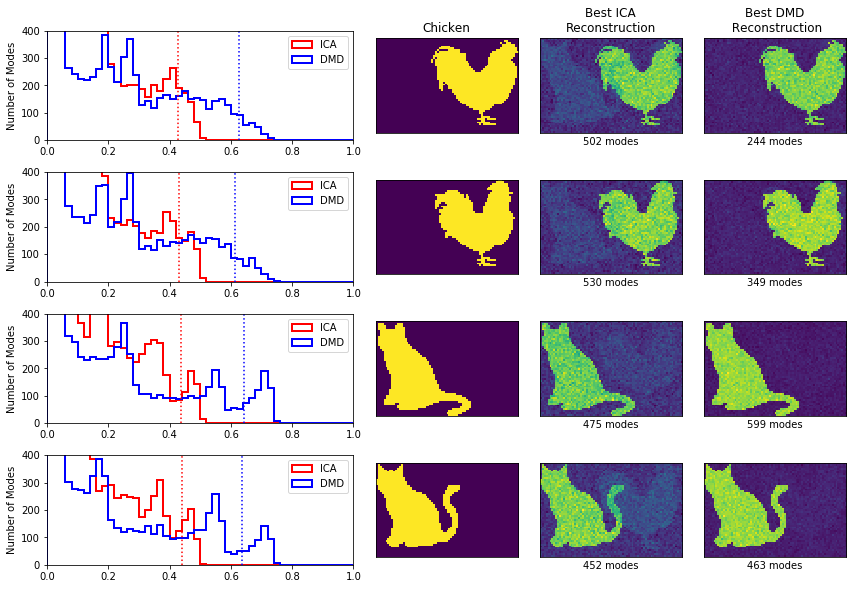

In [365]:
bins=np.linspace(0,1,51)
fig=plt.figure(figsize=(12,10))
fig.patch.set_facecolor((1,1,1,1))
for k in range(Cdmd.shape[0]):
    N=np.arange(1,600,1)
    
    ndmd=N[np.argmax([np.corrcoef(rsn[k],dmd[Cdmd[k].argsort()[-n:]].mean(0))[0][1] for n in N])]
    tdmd=np.sort(Cdmd[k])[-ndmd]
    best_dmd=dmd[Cdmd[k].argsort()[-ndmd:]].mean(0).reshape(image_size)
    
    nica=N[np.argmax([np.corrcoef(rsn[k],ica[Cica[k].argsort()[-n:]].mean(0))[0][1] for n in N])]
    tica=np.sort(Cica[k])[-nica]
    best_ica=ica[Cica[k].argsort()[-nica:]].mean(0).reshape(image_size)
    
    plt.subplot2grid((5,5),(k,0),colspan=2)
    plt.hist(Cica[k],bins=bins,label='ICA',histtype='step',lw=2,color=[1,0,0])
    plt.hist(Cdmd[k],bins=bins,label='DMD',histtype='step',lw=2,color=[0,0,1])
    yl=plt.ylim()
    plt.plot([tica]*2,yl,':',c=[1,0,0])
    plt.plot([tdmd]*2,yl,':',c=[0,0,1])
    plt.ylim(yl)

    plt.legend()
    plt.ylim([0,400])
    plt.xlim([0,1])
    plt.ylabel('Number of Modes')
    #plt.xlabel('Correlation with Chicken {:}'.format(chicken_labels[k]))
    
    plt.subplot2grid((5,5),(k,2))
    plt.imshow(rsn[k].reshape(image_size))
    if k==0:
        plt.title('Chicken')
    plt.xticks([]);plt.yticks([]);
    
    plt.subplot2grid((5,5),(k,3))
    plt.imshow(best_ica)
    plt.xticks([]);plt.yticks([]);
    if k==0:
        plt.title('Best ICA\nReconstruction')
    plt.xlabel('{:} modes'.format(nica))
    plt.subplot2grid((5,5),(k,4))
    plt.imshow(best_dmd)
    plt.xticks([]);plt.yticks([]);
    if k==0:
        plt.title('Best DMD\n Reconstruction')
    plt.xlabel('{:} modes'.format(ndmd))
plt.tight_layout()
plt.savefig('./Figs/best_reconstructions.svg')

### 2_Calculate_Clusters-sDMD

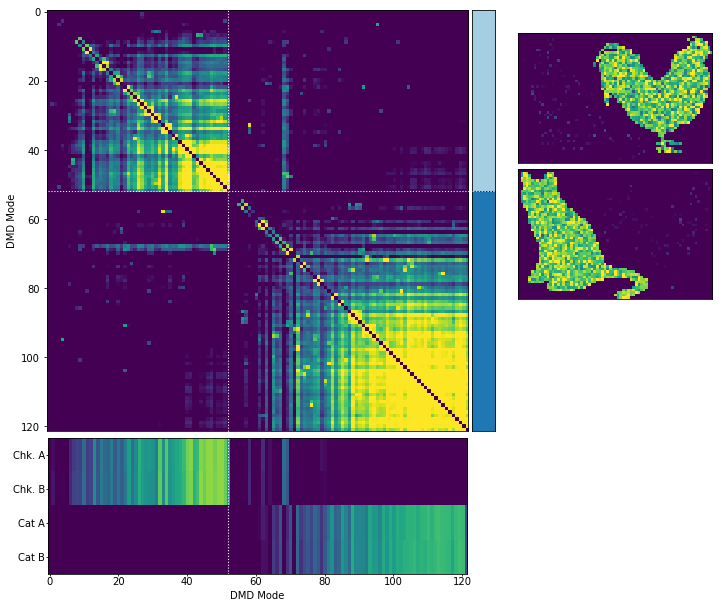

In [373]:
import scipy.cluster.hierarchy as sch
import scipy.spatial.distance as ssd
##CLUSTERING PARAMETERS:
zthresh=0.63
mthresh=7
fclust_thresh=0.99
min_clust_size=50

F=np.vstack(Fall[0][0])
#CALCULATE/THRESHOLD ON SPATIAL CONTINUITY
Mflat=(F-np.mean(F,1)[:,None])/F.std(1)[:,None]
mpro=[]
for f in Mflat:
    m=(f>2.0).reshape(image_size)
    #mpro: product of masks with masks which have been shifted diagonally
    mpro.append(np.sum(np.sum(m[1:,1:]*m[:-1,:-1],0),0))
mpro=np.hstack(mpro) 
mwhere=mpro>mthresh

#convert modes to zscores and threshold to create masks to cluster
Fz=F[mwhere,:]
Fz=(Fz-np.mean(Fz,1)[:,None])/np.std(Fz,1)[:,None]
Fn=(Fz>zthresh).astype(float)

#calculate overlap between mode masks and reference chickens
rsn=np.vstack([c.ravel() for c in chickens]+[c.ravel() for c in cats])
rlabs=['Chk. A','Chk. B','Cat A','Cat B']
overlap=rsn.dot(Mflat.T)

#cluster modes based upon average correlation between groups
method='average';metric='correlation';
Z=sch.linkage(Fn, method, metric)
ix=sch.dendrogram(Z,no_plot=True)['leaves']
#form flat clusters
cgroups=sch.fcluster(Z,fclust_thresh,'distance')[ix]
cgroups=cgroups.astype(float)

#count the number of modes belonging to each cluster, and remove clusters with less than 'min_clust_size' members
cun,count=np.unique(cgroups,return_counts=True)
for k,c in enumerate(cun):
    if count[k]<min_clust_size:
        cgroups[cgroups==c]=-1

cgroups=np.unique(cgroups,return_inverse=True)[1].astype(float)
cgroups[cgroups==0]=np.nan
cgroups+=-1

#cif
cif=np.isfinite(cgroups)
cuni=np.unique(cgroups[cif])

cbig=np.ones(cgroups.shape)*np.nan
ck=-1
for c in cuni:
    if np.sum(cgroups==c)>=min_clust_size:
        ck+=1
        cbig[cgroups==c]=ck

glist=np.unique(cgroups[np.isnan(cgroups)==False]).astype(int)
glist_big=[]
for gid in glist:
    if np.sum(cgroups==gid)>=min_clust_size:
        glist_big.append(gid)
glist_big=np.array(glist_big)
        
#sort the RSN overlap array by hierarchical clustering order
Ou=overlap[:,mwhere][:,ix][:,cif]
Ou=(Ou-Ou.mean(1)[:,None])/Ou.std(1)[:,None]
import skimage.transform as skit
#'scale_factor' is a factor to scale down plotted image size -- use for many thousands of modes
scale_factor=3
Fsub=skit.downscale_local_mean(Fn[ix][cif],(scale_factor,1))
Cor=ssd.cdist(Fsub,Fsub,metric=metric)
Cor=np.abs(1-Cor);
np.fill_diagonal(Cor,0)



# PLOT FIGURE

plt.figure(figsize=(16,9))

a1=plt.subplot2grid((6,1),(0,0))    
plt.imshow(Cor,vmin=Cor.mean(),vmax=Cor.mean()+2.0*Cor.std())
yl=plt.ylim()
plt.ylim(yl)
plt.xticks([])
plt.ylabel('DMD Mode')

a2=plt.subplot2grid((6,1),(1,0))
vmin=Ou.mean();vmax=Ou.mean()+2.0*Ou.std()
plt.imshow(skit.downscale_local_mean(Ou,(1,scale_factor)),aspect='auto',vmin=vmin,vmax=vmax)
plt.yticks(np.arange(len(rlabs)),rlabs,rotation=0)
a2.tick_params(pad=1,length=2)
xl=plt.xlim()
plt.xlim(xl)
plt.xlabel('DMD Mode')


a4=plt.subplot2grid((6,1),(2,0))
plt.imshow(cbig[cif][:,None]%12,cmap='Paired',aspect='auto',vmin=0,vmax=12)
plt.xticks([]);plt.yticks([])

a5=plt.subplot2grid((6,1),(3,0),frameon=False)
lplot=np.where(cbig[cif][1:]!=cbig[cif][:-1])[0].astype(float)/(Cor.shape[0]*scale_factor)
cut=0.95
for lp in lplot:
    plt.plot([0,cut],[lp]*2,':',c=[1,1,1],lw=1.1)
    plt.plot([cut,1],[lp]*2,':',c=[0,0,0],lw=1.1)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xticks([])
plt.yticks([])
a5.invert_yaxis()

a6=plt.subplot2grid((6,1),(4,0),frameon=False)
lplot=np.where(cbig[cif][1:]!=cbig[cif][:-1])[0].astype(float)/(Cor.shape[0]*scale_factor)
cut=0.95
for lp in lplot:
    plt.plot([lp]*2,[0,1],':',c=[1,1,1],lw=1.1)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xticks([])
plt.yticks([])

x1=0.0578
y1=0.3
y2=0.08
w1=0.364
a1.set_position([0.00,y1,0.48,0.65])
a2.set_position([x1,y2,w1,0.21])    
a4.set_position([0.426,y1,0.025*0.8,0.65])
a5.set_position([x1,y1,w1+0.025,0.65])
a6.set_position([x1,y2,w1,0.87])

DMN=[]
for gk,gid in enumerate(glist_big):
    a6=plt.axes([0.45,0.714-0.21*gk,0.2,0.2])
    dmn=np.mean(F[mwhere][ix][cgroups==gid],0)
    vmin=dmn.mean()+0.0*dmn.std();vmax=dmn.mean()+2.0*dmn.std()
    DMN.append(dmn)
    D=dmn.reshape(image_size)
    D[D==0]=np.nan
    cm=mpl.cm.viridis
    plt.imshow(D,vmin=vmin,vmax=vmax,cmap=cm)
    plt.xticks([]);plt.yticks([])

DMN=np.vstack(DMN)


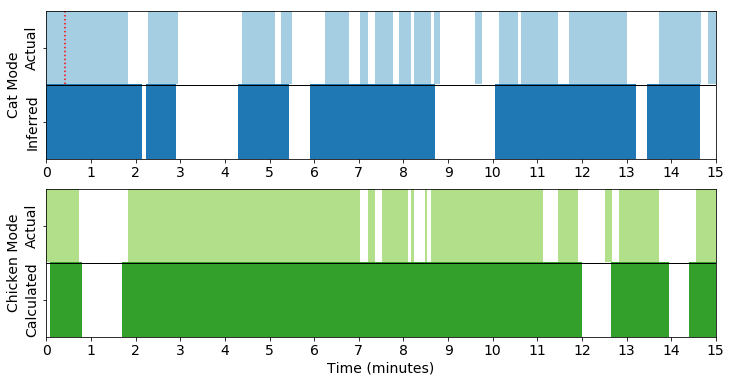

In [517]:
s=np.array(S[0][0])
smat=np.vstack([s==0,s==1])|np.array(s==2)
smat=smat.astype(float)

jx=jxall[0][0]

frame_shift=4
cuni=np.unique(cbig[np.isfinite(cbig)])
juni=np.unique(jx)
T=np.zeros((len(cuni),1200))
for c in cuni.astype(int):
    jc=jx[mwhere][ix][cgroups==c].astype(int)
    for jcc in jc:
        T[c,(jcc*frame_shift):(jcc*frame_shift+nframes)]+=1

        

Tm1=np.vstack([smat[1],T[1]>0])
Tm1[Tm1==0]=np.nan
Tm1*=np.arange(2)[:,None]
Tm2=np.vstack([smat[0],T[0]>0])
Tm2[Tm2==0]=np.nan
Tm2*=np.arange(2,4)[:,None]

plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.imshow(Tm1,aspect='auto',cmap='Paired',vmin=0,vmax=12)
xl=plt.xlim();
plt.plot(xl,[0.5]*2,c=[0,0,0],lw=1.0)
plt.xlim(xl);plt.ylim([-0.5,1.5])
plt.yticks([0,1],['Actual','Inferred'],rotation=90,va='center',fontsize=14)
plt.ylabel('Cat Mode',fontsize=14)
plt.plot([32.5,32.5],[-0.5,0.5],':',c=[1,0,0])
plt.gca().invert_yaxis()
xt=np.linspace(0,1200,16)
plt.xticks(xt,np.arange(16),fontsize=14)

plt.subplot(2,1,2)
plt.imshow(Tm2,aspect='auto',cmap='Paired',vmin=0,vmax=12)
xl=plt.xlim();
plt.plot(xl,[0.5]*2,c=[0,0,0],lw=1.0)
plt.xlim(xl);plt.ylim([-0.5,1.5])
plt.xticks([])
plt.yticks([0,1],['Actual','Calculated'],rotation=90,va='center',fontsize=14)
plt.ylabel('Chicken Mode',fontsize=14)
plt.gca().invert_yaxis()
xt=np.linspace(0,1200,16)
plt.xticks(xt,np.arange(16),fontsize=14)
plt.xlabel('Time (minutes)',fontsize=14)

plt.savefig('./Figs/sdmd_activations.svg')

#### Do sDMD for all and calculate transition probabilities

In [441]:
import scipy.cluster.hierarchy as sch
import scipy.spatial.distance as ssd
##CLUSTERING PARAMETERS:
zthresh=0.63
mthresh=8
fclust_thresh=0.95
min_clust_size=30


def calc_trans(ri,ui,zthresh=0.63,mthresh=8,fclust_thresh=0.95,min_clust_size=30,ploton=False):
    F=Fall[ri][ui]
    jx=jxall[ri][ui]
    
    #CALCULATE/THRESHOLD ON SPATIAL CONTINUITY
    Mflat=(F-np.mean(F,1)[:,None])/F.std(1)[:,None]
    mpro=[]
    for f in Mflat:
        m=(f>2.0).reshape(image_size)
        #mpro: product of masks with masks which have been shifted diagonally
        mpro.append(np.sum(np.sum(m[1:,1:]*m[:-1,:-1],0),0))
    mpro=np.hstack(mpro) 
    mwhere=mpro>mthresh

    #convert modes to zscores and threshold to create masks to cluster
    Fz=F[mwhere,:]
    Fz=(Fz-np.mean(Fz,1)[:,None])/np.std(Fz,1)[:,None]
    Fn=(Fz>zthresh).astype(float)

    #calculate overlap between mode masks and reference chickens
    rsn=np.vstack([c.ravel() for c in chickens]+[c.ravel() for c in cats])
    rlabs=['Chk. A','Chk. B','Cat A','Cat B']
    overlap=rsn.dot(Mflat.T)

    #cluster modes based upon average correlation between groups
    method='average';metric='correlation';
    Z=sch.linkage(Fn, method, metric)
    ix=sch.dendrogram(Z,no_plot=True)['leaves']
    #form flat clusters
    cgroups=sch.fcluster(Z,fclust_thresh,'distance')[ix]
    cgroups=cgroups.astype(float)

    #count the number of modes belonging to each cluster, and remove clusters with less than 'min_clust_size' members
    cun,count=np.unique(cgroups,return_counts=True)
    for k,c in enumerate(cun):
        if count[k]<min_clust_size:
            cgroups[cgroups==c]=-1

    cgroups=np.unique(cgroups,return_inverse=True)[1].astype(float)
    cgroups[cgroups==0]=np.nan
    cgroups+=-1

    #cif
    cif=np.isfinite(cgroups)
    cuni=np.unique(cgroups[cif])

    cbig=np.ones(cgroups.shape)*np.nan
    ck=-1
    for c in cuni:
        if np.sum(cgroups==c)>=min_clust_size:
            ck+=1
            cbig[cgroups==c]=ck

    glist=np.unique(cgroups[np.isnan(cgroups)==False]).astype(int)
    glist_big=[]
    for gid in glist:
        if np.sum(cgroups==gid)>=min_clust_size:
            glist_big.append(gid)
    glist_big=np.array(glist_big)

    #sort the RSN overlap array by hierarchical clustering order
    Ou=overlap[:,mwhere][:,ix][:,cif]
    Ou=(Ou-Ou.mean(1)[:,None])/Ou.std(1)[:,None]
    import skimage.transform as skit
    #'scale_factor' is a factor to scale down plotted image size -- use for many thousands of modes
    scale_factor=3
    Fsub=skit.downscale_local_mean(Fn[ix][cif],(scale_factor,1))
    Cor=ssd.cdist(Fsub,Fsub,metric=metric)
    Cor=np.abs(1-Cor);
    np.fill_diagonal(Cor,0)



    # PLOT FIGURE
    if ploton:
        plt.figure(figsize=(16,9))

        a1=plt.subplot2grid((6,1),(0,0))    
        plt.imshow(Cor,vmin=Cor.mean(),vmax=Cor.mean()+2.0*Cor.std())
        yl=plt.ylim()
        plt.ylim(yl)
        plt.xticks([])
        plt.ylabel('DMD Mode')

        a2=plt.subplot2grid((6,1),(1,0))
        vmin=Ou.mean();vmax=Ou.mean()+2.0*Ou.std()
        plt.imshow(skit.downscale_local_mean(Ou,(1,scale_factor)),aspect='auto',vmin=vmin,vmax=vmax)
        plt.yticks(np.arange(len(rlabs)),rlabs,rotation=0)
        a2.tick_params(pad=1,length=2)
        xl=plt.xlim()
        plt.xlim(xl)
        plt.xlabel('DMD Mode')


        a4=plt.subplot2grid((6,1),(2,0))
        plt.imshow(cbig[cif][:,None]%12,cmap='Paired',aspect='auto',vmin=0,vmax=12)
        plt.xticks([]);plt.yticks([])

        a5=plt.subplot2grid((6,1),(3,0),frameon=False)
        lplot=np.where(cbig[cif][1:]!=cbig[cif][:-1])[0].astype(float)/(Cor.shape[0]*scale_factor)
        cut=0.95
        for lp in lplot:
            plt.plot([0,cut],[lp]*2,':',c=[1,1,1],lw=1.1)
            plt.plot([cut,1],[lp]*2,':',c=[0,0,0],lw=1.1)
        plt.xlim([0,1])
        plt.ylim([0,1])
        plt.xticks([])
        plt.yticks([])
        a5.invert_yaxis()

        a6=plt.subplot2grid((6,1),(4,0),frameon=False)
        lplot=np.where(cbig[cif][1:]!=cbig[cif][:-1])[0].astype(float)/(Cor.shape[0]*scale_factor)
        cut=0.95
        for lp in lplot:
            plt.plot([lp]*2,[0,1],':',c=[1,1,1],lw=1.1)
        plt.xlim([0,1])
        plt.ylim([0,1])
        plt.xticks([])
        plt.yticks([])

        x1=0.0578
        y1=0.3
        y2=0.08
        w1=0.364
        a1.set_position([0.00,y1,0.48,0.65])
        a2.set_position([x1,y2,w1,0.21])    
        a4.set_position([0.426,y1,0.025*0.8,0.65])
        a5.set_position([x1,y1,w1+0.025,0.65])
        a6.set_position([x1,y2,w1,0.87])

    DMN=[]
    for gk,gid in enumerate(glist_big):
        a6=plt.axes([0.45,0.714-0.21*gk,0.2,0.2])
        dmn=np.mean(F[mwhere][ix][cgroups==gid],0)
        DMN.append(dmn)
        if ploton:
            vmin=dmn.mean()+0.0*dmn.std();vmax=dmn.mean()+2.0*dmn.std()
            D=dmn.reshape(image_size)
            D[D==0]=np.nan
            cm=mpl.cm.viridis
            plt.imshow(D,vmin=vmin,vmax=vmax,cmap=cm)
            plt.xticks([]);plt.yticks([])

    DMN=np.vstack(DMN)

    frame_shift=4
    cuni=np.unique(cbig[np.isfinite(cbig)])
    juni=np.unique(jx)
    T=np.zeros((len(cuni),1200))
    for c in cuni.astype(int):
        jc=jx[mwhere][ix][cgroups==c].astype(int)
        for jcc in jc:
            T[c,(jcc*frame_shift):(jcc*frame_shift+nframes)]+=1

    rsn_match=np.argmin(ssd.cdist(rsn,DMN),0)
    cat_first=rsn_match[0]>rsn_match[1]
    if cat_first==False:
        T=np.flipud(T)
    
    return T

def T2Trans(T,thresh=0):
    T=T>thresh
    
    T=np.array([1,2]).dot(T)-1

    Trans=np.zeros((3,3))
    for k in range(len(T)-1):
        Trans[T[k+1],T[k]]+=1
    Trans=Trans/np.sum(Trans,0)[None,:]
    return Trans

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


[array([[0., 0., 0., ..., 1., 1., 1.],
        [1., 1., 1., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
        [2., 2., 2., ..., 1., 1., 1.]]), array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
        [1., 1., 1., ..., 1., 1., 1.]]), array([[1., 1., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 1., 1.]]), array([[0., 0., 0., ..., 0., 0., 0.],
        [1., 1., 1., ..., 1., 1., 1.]]), array([[2., 2., 2., ..., 0., 0., 0.],
        [0., 0., 0., ..., 2., 2., 2.]]), array([[1., 1., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 1., 1.]]), array([[2., 2., 2., ..., 1., 1., 1.],
        [0., 0., 0., ..., 0., 0., 0.]])]

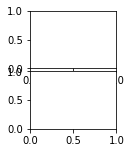

In [442]:
Ts=[]
for i in range(4):
    for j in range(4):
        try:
            Ts.append(calc_trans(i,j,fclust_thresh=0.96))
        except:
            pass
Ts

In [501]:
print(P)
T2mean=np.mean([T2Trans(t,thresh=6) for t in Ts],0)
print(T2mean)

[[0.97  0.01  0.015]
 [0.01  0.97  0.015]
 [0.02  0.02  0.97 ]]
[[9.76147937e-01 5.80122095e-04 1.91616353e-02]
 [1.34223056e-03 9.74334825e-01 2.21887515e-02]
 [2.25098328e-02 2.50850530e-02 9.58649613e-01]]


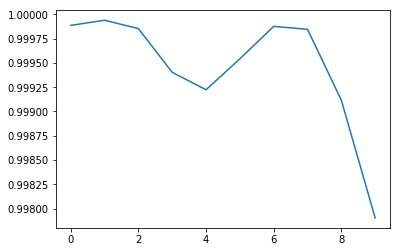

In [479]:
plt.plot([np.corrcoef(np.mean([T2Trans(t,thresh=th) for t in Ts],0).ravel(),P.ravel())[0,1] for th in range(10)])